In [ ]:
!pip install mapclassify

In [ ]:
pip install geopandas 

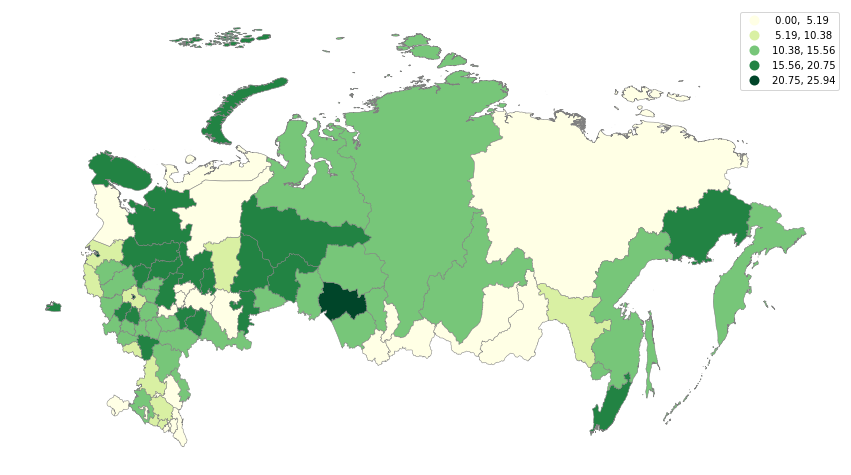

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
datai = pd.read_csv('https://github.com/axdget/GeoPandasGeojsonRussia_regions/raw/main/internet-2017v3.csv')
datag = gpd.read_file('https://github.com/axdget/GeoPandasGeojsonRussia_regions/raw/main/RussiaRegionsNoChukotka.geojson')
merged_g = datai.merge(datag, left_on='reg3', right_on='region', how='right')
merged_g=gpd.GeoDataFrame(merged_g)
merged_g['abon100']=merged_g['abon100'].str.replace(',', '.').astype(float).fillna(0)
merged_g

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
ax.set_aspect('equal')
ax.set_axis_off()
params = {'column': 'abon100',  # имя столбца с данными
          'cmap': 'YlGn',  # цветовая схема
          'legend': True,  # показать легенду
          'scheme': 'equalinterval',  # метод классификации данных
          'k': 5,  # количество классов
          'edgecolor': 'gray',  # цвет границы полигонов
          'linewidth': 0.5}  # толщина линий границы
merged_g.plot(ax=ax,**params)
plt.show()

In [ ]:
merged_g

,Регион,reg2,reg3,reg4,abon100,region,geometry
0,АЛТАЙСКИЙ КРАЙ,Алтайский,Алтайский край,22.0,12.23,Алтайский край,"POLYGON ((82.80364 50.94067, 82.78856 50.94470..."
1,АМУРСКАЯ ОБЛ.,Амурская,Амурская обл.,28.0,7.52,Амурская обл.,"POLYGON ((131.38809 49.25325, 131.28198 49.250..."
2,АРХАНГЕЛЬСКАЯ ОБЛ.,Архангельская,Архангельская обл.,29.0,15.57,Архангельская обл.,"MULTIPOLYGON (((36.77240 63.91510, 36.77083 63..."
3,АСТРАХАНСКАЯ ОБЛ.,Астраханская,Астраханская обл.,30.0,11.35,Астраханская обл.,"POLYGON ((47.59436 45.44006, 47.58152 45.44518..."
4,БЕЛГОРОДСКАЯ ОБЛ.,Белгородская,Белгородская обл.,31.0,9.83,Белгородская обл.,"POLYGON ((38.93024 49.82358, 38.92225 49.83007..."
...,...,...,...,...,...,...,...
79,ЯМАЛО-НЕНЕЦКИЙ АО,Ямало-Ненецкий,Ямало-Ненецкий АО,89.0,15.33,Ямало-Ненецкий АО,"MULTIPOLYGON (((65.99583 69.06250, 65.99375 69..."
80,ЯРОСЛАВСКАЯ ОБЛ.,Ярославская,Ярославская обл.,76.0,18.48,Ярославская обл.,"POLYGON ((38.32256 56.75940, 38.27213 56.80248..."
81,г.МОСКВА,Москва,г. Москва,77.0,24.59,г. Москва,"MULTIPOLYGON (((37.24789 55.58891, 37.24775 55..."
82,г.САНКТ-ПЕТЕРБУРГ,Санкт-Петербург,г. Санкт-Петербург,78.0,21.94,г. Санкт-Петербург,"MULTIPOLYGON (((29.71917 59.97542, 29.71917 59..."


## Стало интересно - сколько же точек в границах региона

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Функция, которая возвращает количество точек в каждом шейпе
def count_points(geometry):
    if geometry.geom_type == 'Polygon':
        return len(geometry.exterior.coords)
    elif geometry.geom_type == 'MultiPolygon':
      num_points = 0
      for i,poly in enumerate(geometry.geoms,1):
        num_points += len(poly.exterior.coords)
        return num_points
    else:
        return 0

merged_g['num_points']=0
merged_g['num_points'] = merged_g['geometry'].apply(count_points)
merged_g[['region','geometry','num_points']].sort_values(by='num_points',ascending=False)

,region,geometry,num_points
29,Московская обл.,"POLYGON ((37.20395 54.84451, 37.20406 54.84484...",4895
41,Псковская обл.,"POLYGON ((31.03134 55.71665, 30.98776 55.69956...",3831
15,Калининградская обл.,"MULTIPOLYGON (((19.73749 54.52271, 19.73749 54...",2171
1,Амурская обл.,"POLYGON ((131.38809 49.25325, 131.28198 49.250...",1829
68,Тверская обл.,"POLYGON ((37.09341 56.51813, 37.08542 56.51865...",1747
...,...,...,...
23,Красноярский край,"MULTIPOLYGON (((81.29583 71.77917, 81.29375 71...",9
26,Ленинградская обл.,"MULTIPOLYGON (((27.74048 58.99960, 27.74021 58...",8
2,Архангельская обл.,"MULTIPOLYGON (((36.77240 63.91510, 36.77083 63...",7
11,Забайкальский край,"MULTIPOLYGON (((107.71410 49.96063, 107.70453 ...",4
